In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train=datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test= datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


In [ ]:
trainset=torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset=torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x,y = data[0][0], data[1][0]
print(y)

tensor(9)


In [ ]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


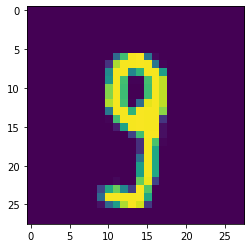

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28)) # Reshape the image as 28x28 image
plt.show()

In [ ]:
# Balancing the dataset
total=0
counter_dict={ 0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, Ys = data # Data has 2 set of tensors
  for y in Ys:
    counter_dict[int(y)]+=1
    total+=1
print(counter_dict)
    

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


## Building the Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
   super().__init__()
   # Inhereits from nn.Module (parent class) and runs nn.Module (parent class)'s init method 

   # Defining the Layers

   self.fc1=nn.Linear(28*28, 64) # Fully Connected Layer 1 
   # Input: 784=28*28 , Output: Target is 3 layers of 64 neurons for hidden layers.
   self.fc2=nn.Linear(64, 64) # Fully Connected Layer 2 
   self.fc3=nn.Linear(64, 64) # Fully Connected Layer 3 
   self.fc4=nn.Linear(64, 10) # Fully Connected Layer 4 / 10: Number of classes (0,1,2..9)

   # Defining the Path to take through the layers (Feed Forward)

  def forward(self, x):
    x=F.relu(self.fc1(x)) # x passes through all layers and running the activation function for that layer.
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x) # Just passing the data to the last layer
    return F.log_softmax(x, dim=1) # Apply softmax

net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X=torch.rand((28,28))
X=X.view(-1, 28*28) # Flatten operation and  

In [ ]:
output=net(X)

In [ ]:
output

tensor([[-2.4083, -2.3686, -2.2206, -2.2796, -2.2086, -2.3292, -2.4292, -2.3390,
         -2.1817, -2.2933]], grad_fn=<LogSoftmaxBackward0>)

Loss : Measure of how wrong is the model

Optimizer : Optimize and adjust the possible weights it can adjust in such a way so it lowers the loss.

In [ ]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(), lr=0.001)
# .parameters() : corresponds to every paramater that can be adjustable. 
# Decaying learning rate : starts big then get smaller. 

EPOCHS=3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of features and labels
    X, y= data
    net.zero_grad() # making gradient zero

    # Passing data through the network
    output=net(X.view(-1, 28*28))

    # Loss calculation
    loss= F.nll_loss(output,y)

    # Backpropogation
    loss.backward()

    # Adjusting the weights
    optimizer.step()
  
  print(loss)

tensor(0.3696, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.0747, grad_fn=<NllLossBackward0>)


In [ ]:
correct= 0
total=0

# We are trying to evaluate in our data and we don't want to calculate the gradients.
with torch.no_grad():
  for data in trainset:
    X,y = data
    output=net(X.view(-1,28*28))

    # Our targets are scaler values: 1,4,5.. and Neural network output is in Argmax.
    # So we do the comparison like this in the below.

    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct=+1
      total=+1

print("Accuracy: ", round(correct/total,3))

Accuracy:  1.0


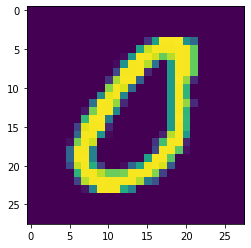

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[1].view(-1,28*28))[0]))

tensor(0)
